In [1]:
import tweepy

In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# CNN Twitter Sentiment Analysis

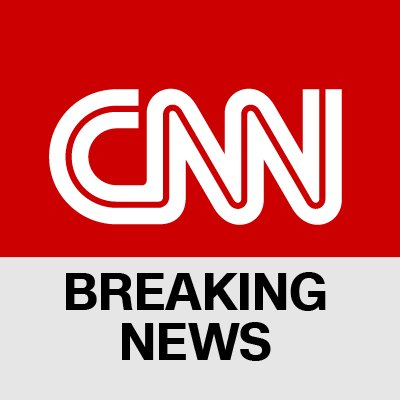

In [103]:
from IPython.display import Image
Image(filename='cnn.jpg')

In [3]:
import nltk
from nltk.corpus import stopwords

In [ ]:
# Twitter Credentials

consumer_key = ##########
consumer_secret = ########

access_token = #########
access_token_secret = #############

In [5]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret) 

In [6]:
authenticate.set_access_token(access_token, access_token_secret) 

In [7]:
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [8]:
screen_name1 = 'cnnbrk'

In [9]:
alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name = screen_name1,count=200)
    
    #save most recent tweets
alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    #print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = screen_name1,count=200,max_id=oldest)
        
        #save most recent tweets
    alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
        
    #print(f"...{len(alltweets)} tweets downloaded so far")
    


In [10]:
for j in alltweets:
    
    #print("retweet count is :", j.retweet_count)
    #print("tweet is :", j.full_text)
    totaltweet = j.user.statuses_count
    followin = j.user.friends_count
    Descriptio = j.user.description
    follower = j.user.followers_count
    Prof_image_ur = j.user.profile_image_url

# Twitter Account Description

In [11]:
print("Desrciption is :",Descriptio)

Desrciption is : Breaking news from CNN Digital. Now 59M strong. Check @cnn for all things CNN, breaking and more. Download the app for custom alerts: https://t.co/UCHG9M367J


# Twitter Account Profile Image

Profile image url is : http://pbs.twimg.com/profile_images/925092227667304448/fAY1HUu3_normal.jpg


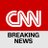

In [12]:
print("Profile image url is :", Prof_image_ur)
from IPython.display import Image
Profile_Image = Image(Prof_image_ur)
Profile_Image

# Twitter Account Followers

In [13]:
print('The number of followers this Twitter Account has are: ', follower)

The number of followers this Twitter Account has are:  59850605


# Twitter Account Following

In [14]:
print('The number of Twitter Accounts followed by this Twitter Account has are: ', followin)

The number of Twitter Accounts followed by this Twitter Account has are:  118


# Total Tweets by this Twitter Account

In [15]:
print('The total number of tweets by this Twitter Account are:', totaltweet)

The total number of tweets by this Twitter Account are: 73583


In [16]:
twt = []
hshtg = []
retweet = []

for twee in alltweets:

    twt.append(twee.text)
    retweet.append(twee.retweet_count)
    hs = twee.entities['hashtags']
    if len(hs) != 0:
        
        hh_list = []
        for i in range(len(hs)):
            dct = hs[i]
            hh_list.append(str(dct.get('text')))
        hshtg.append(hh_list)
        
    else:
        hshtg.append([])
        

In [17]:
dicts = {'Tweets': twt, 'Hashtags': hshtg, 'Retweets':retweet}  

In [18]:
dfs = pd.DataFrame(dicts)

In [19]:
dfs.shape

(3244, 3)

# Tweets Dataset

In [20]:
dfs.head()

,Tweets,Hashtags,Retweets
0,The US Food and Drug Administration has grante...,[],213
1,The United States has reported a record-high 2...,[],313
2,Biden is expected to nominate Katherine Tai as...,[],154
3,"Beginning in fall of 2022, Connecticut will re...",[],764
4,President Trump has asked the Supreme Court to...,[],360


# Tweets Word Count Distribution

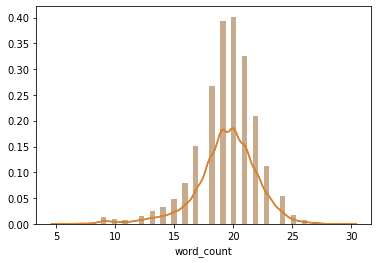

In [21]:
# Word Count Distribution Histogram

dfs["word_count"] = dfs["Tweets"].apply(lambda tweet: len(tweet.split()))
sns_plot = sns.distplot(dfs['word_count'])
fig = sns_plot.get_figure()
fig.savefig("cnn_word_count.png")
sns.distplot(dfs['word_count'])

In [22]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [23]:
senti_analyzer = SentimentIntensityAnalyzer()

In [24]:
compound_score = []

for sen in dfs['Tweets']:
    
    compound_score.append(senti_analyzer.polarity_scores(sen)['compound'])

In [25]:
dfs['Compound Score'] = compound_score

In [26]:
Sentiment = []

for i in compound_score:
    
    if i >= 0.05:
        
        Sentiment.append('Positive')
        
    elif i > -0.05 and i < 0.05:
        
        Sentiment.append('Neutral')
        
    else:
        
        Sentiment.append('Negative')
        

In [27]:
dfs['Sentiment'] = Sentiment

In [28]:
pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

# Sentiment Distribution of the Tweets

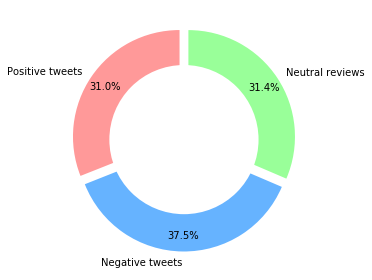

In [29]:
# Sentiment Distribution

pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive tweets', 'Negative tweets', 'Neutral reviews']
sizes = [pos_count, neg_count, neu_count]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('cnn_sentiment_distribution.png')

plt.show()

# Most Positive Tweet

In [30]:
# Most Positive Tweet

pos_max = dfs.loc[dfs['Compound Score']==max(dfs['Compound Score'])]
pos_max

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1076,"RT @CNN: ""Schitt’s Creek"" wins outstanding com...",[Emmys],562,23,0.9403,Positive


# Most Negative Tweet

In [31]:
# Most Negative Tweet

neg_max = dfs.loc[dfs['Compound Score']==min(dfs['Compound Score'])]
neg_max[:1]

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
256,Hate crime reports in 2019 reached their highe...,[],399,21,-0.9584,Negative


# Positive Tweets

In [32]:
# Positive Tweets

gp = dfs.groupby(by=['Sentiment'])
positive_tweets = gp.get_group('Positive')
positive_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1,The United States has reported a record-high 2...,[],313,20,0.4215,Positive
5,The House has approved a short-term funding bi...,[],91,20,0.1531,Positive
24,Former national security adviser Michael Flynn...,[],107,18,0.0772,Positive
28,Drugmaker AstraZeneca's coronavirus vaccine ca...,[],266,17,0.6908,Positive
29,The FDA confirms safety data and efficacy of P...,[],303,20,0.4215,Positive


# Negative Tweets

In [33]:
# Negative Tweets

negative_tweets = gp.get_group('Negative')
negative_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
0,The US Food and Drug Administration has grante...,[],213,18,-0.1531,Negative
4,President Trump has asked the Supreme Court to...,[],360,20,-0.2500,Negative
14,Health officials in England are advising peopl...,[],648,19,-0.1027,Negative
16,House passes a sweeping defense bill with veto...,[],192,19,-0.3612,Negative
18,Supreme Court denies Republicans' request to b...,[],1005,18,-0.2732,Negative


# Neutral Tweets

In [34]:
# Neutral Tweets

neutral_tweets = gp.get_group('Neutral')
neutral_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
2,Biden is expected to nominate Katherine Tai as...,[],154,20,0.0,Neutral
3,"Beginning in fall of 2022, Connecticut will re...",[],764,19,0.0,Neutral
6,All 50 states and the District of Columbia hav...,[],2444,18,0.0,Neutral
7,"President-elect Joe Biden's son, Hunter Biden,...",[],174,19,0.0,Neutral
8,The US government and dozens of states sued Fa...,[],208,19,0.0,Neutral


# Wordcloud Function

In [35]:
# Wordcloud Function

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [36]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['say','says', 'cou', 'new', 'news', 'repo']
stopwords.extend(newStopWords)

In [37]:
def wordcloud(data):
    
    words_corpus = ''
    words_list = []

    
    for rev in data["Tweets"]:
        
        text = str(rev).lower()
        text = text.replace('rt', ' ') 
        text = re.sub(r"http\S+", "", text)        
        text = re.sub(r'[^\w\s]','',text)
        text = ''.join([i for i in text if not i.isdigit()])
        
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords]
        
        # Remove aplha numeric characters
        
        for words in tokens:
            
            words_corpus = words_corpus + words + " "
            words_list.append(words)
            
    return words_corpus, words_list

In [38]:
import cv2
image1 = cv2.imread('mask1.png')
mask = np.array(image1)

# WordCloud - Positive Tweets

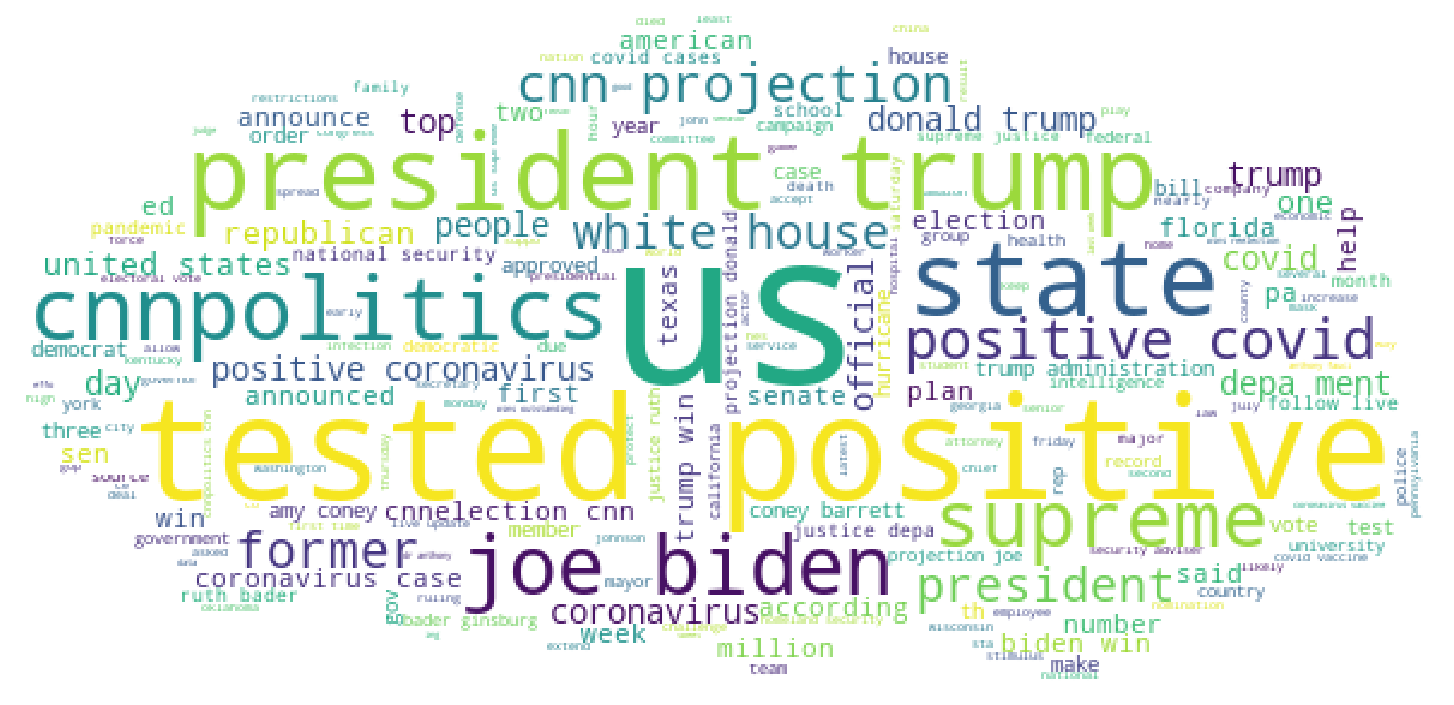

In [39]:
# WordCloud - Positive Tweets

from wordcloud import WordCloud
positive_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(positive_tweets)[0])
    
plot_Cloud(positive_wordcloud)
positive_wordcloud.to_file('cnn_positive_tweets_wc.png')


# WordCloud - Negative Tweets

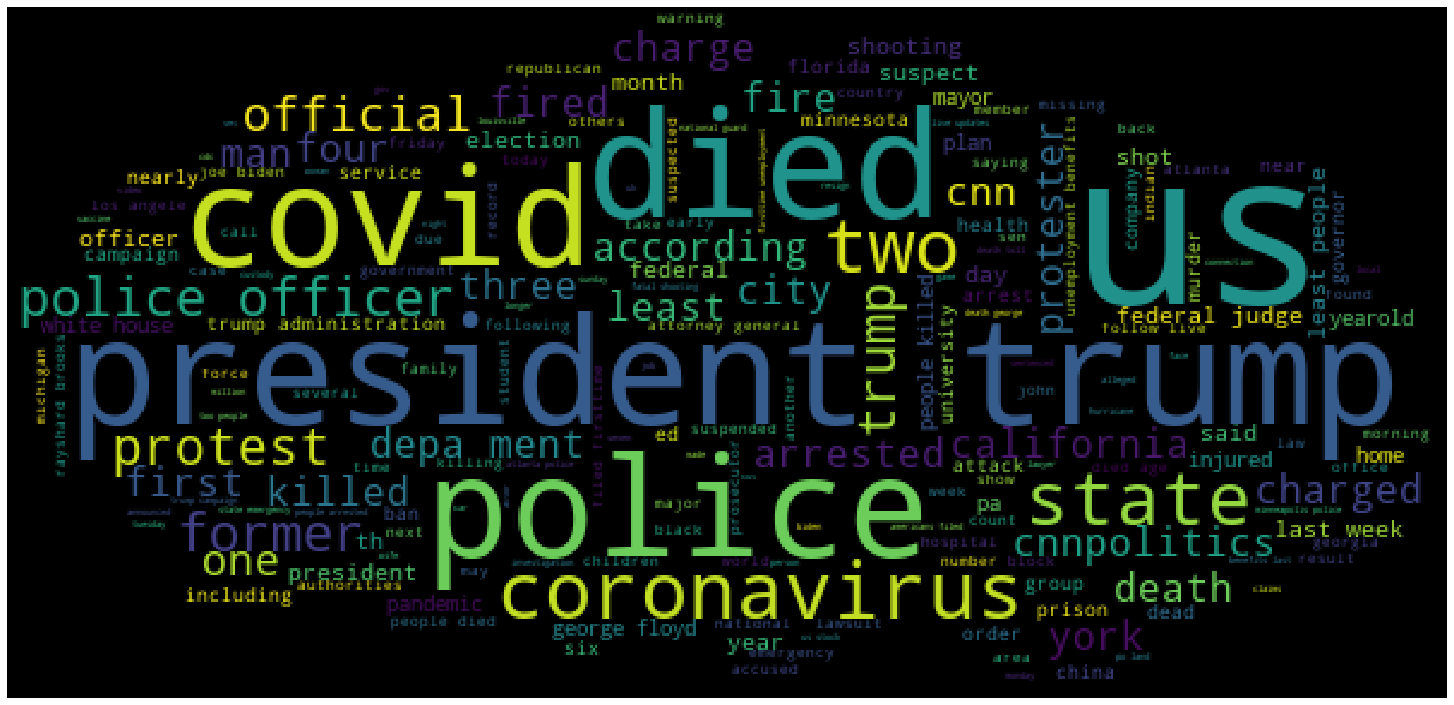

In [40]:
# WordCloud - Negative Tweets

negative_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(negative_tweets)[0])

plot_Cloud(negative_wordcloud)
negative_wordcloud.to_file('cnn_negative_tweets_wc.png')


# WordCloud - Neutral Tweets

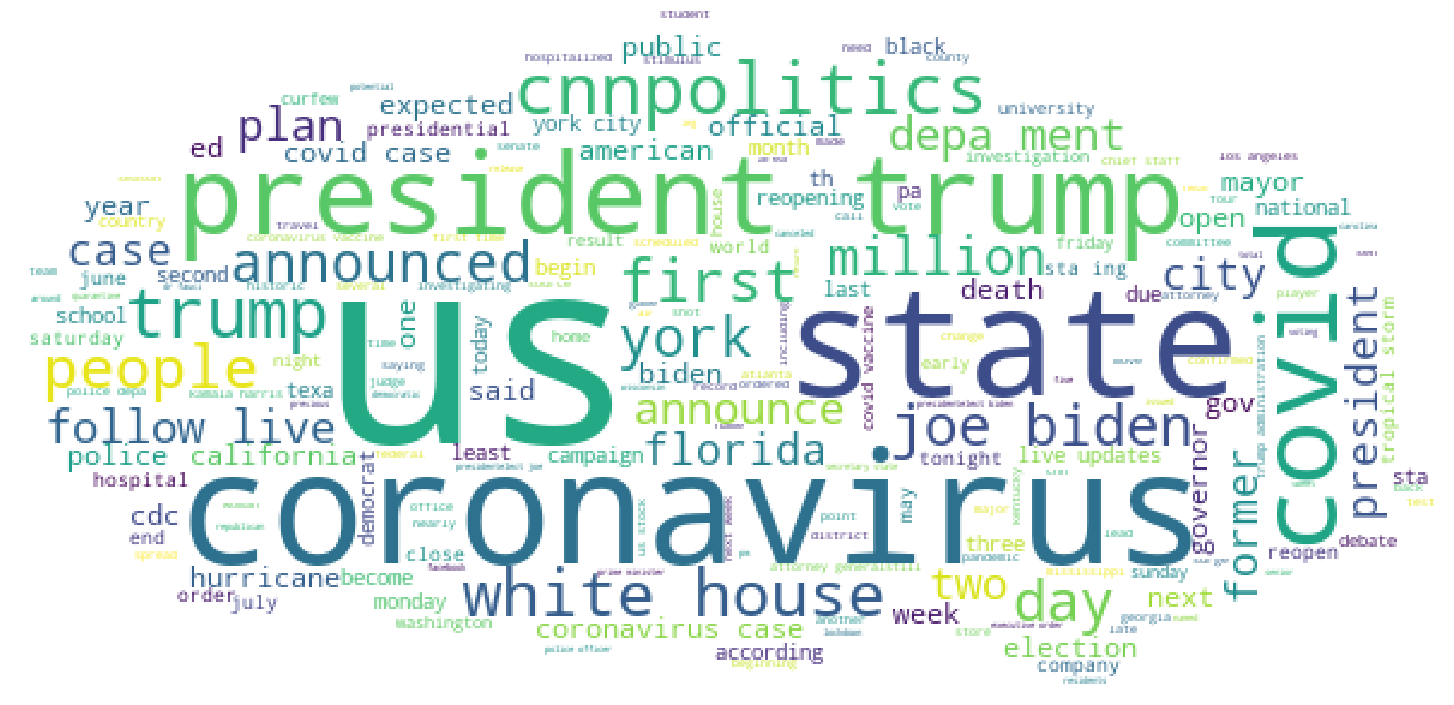

In [41]:
# WordCloud - Neutral Tweets

neutral_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(neutral_tweets)[0])

plot_Cloud(neutral_wordcloud)
neutral_wordcloud.to_file('cnn_neutral_tweets_wc.png')


# Wordcloud - All Tweets

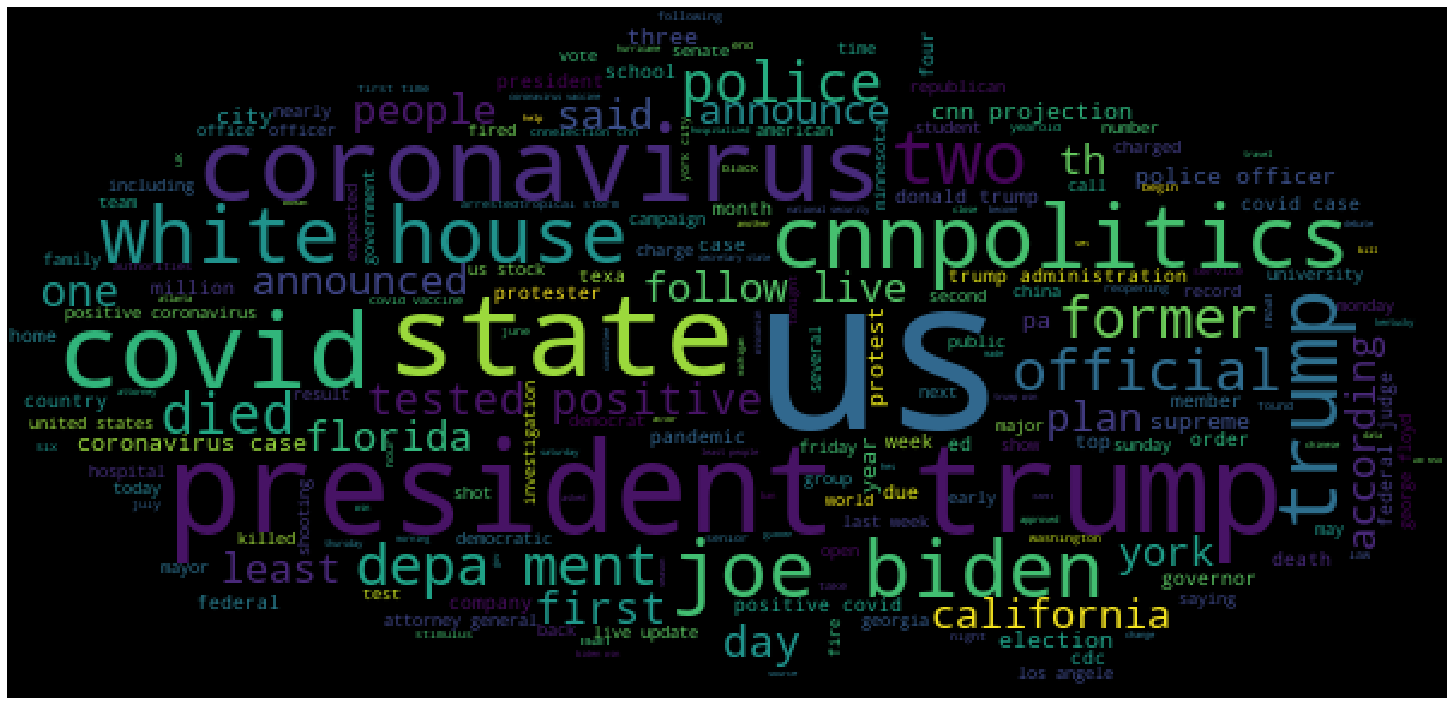

In [42]:
# Wordcloud - All Tweets

total_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(dfs)[0])

plot_Cloud(total_wordcloud)
total_wordcloud.to_file('cnn_total_tweets_wc.png')


# Most Frequent Words - Total Tweets

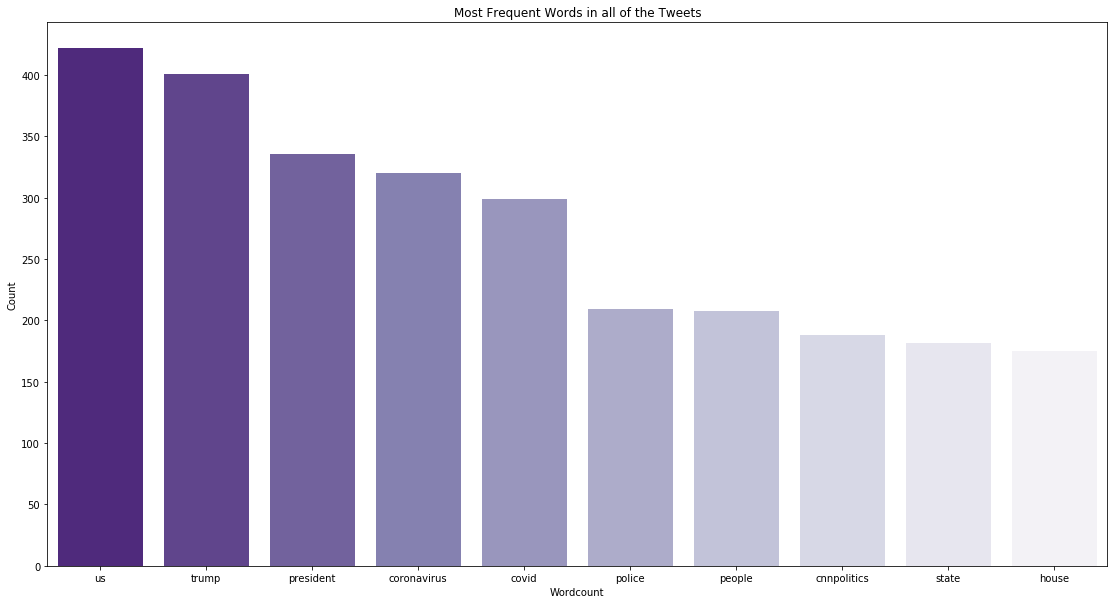

In [48]:
# Most Frequent Words - Total Tweets

aa = nltk.FreqDist(wordcloud(dfs)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in all of the Tweets')
ax = sns.barplot(data=dd,palette="Purples_r", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()

fig.savefig("cnn_total_tweets_wf.png")
plt.show()

# Most Frequent Words - Positive Tweets

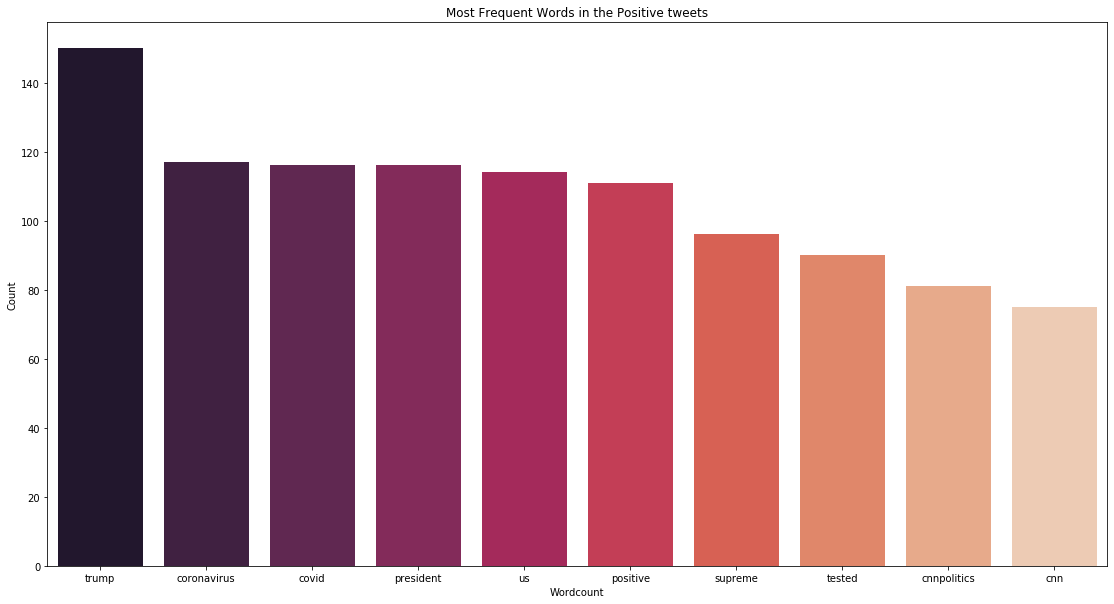

In [44]:
# Most Frequent Words - Positive Tweets

ap = nltk.FreqDist(wordcloud(positive_tweets)[1])
dp = pd.DataFrame({'Wordcount': list(ap.keys()),
                  'Count': list(ap.values())})
# selecting top 10 most frequent hashtags     
dp = dp.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Positive tweets')
ax = sns.barplot(data=dp,palette="rocket", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("cnn_positive_tweets_wf.png")
plt.show()

# Most Frequent Words - Negative Tweets

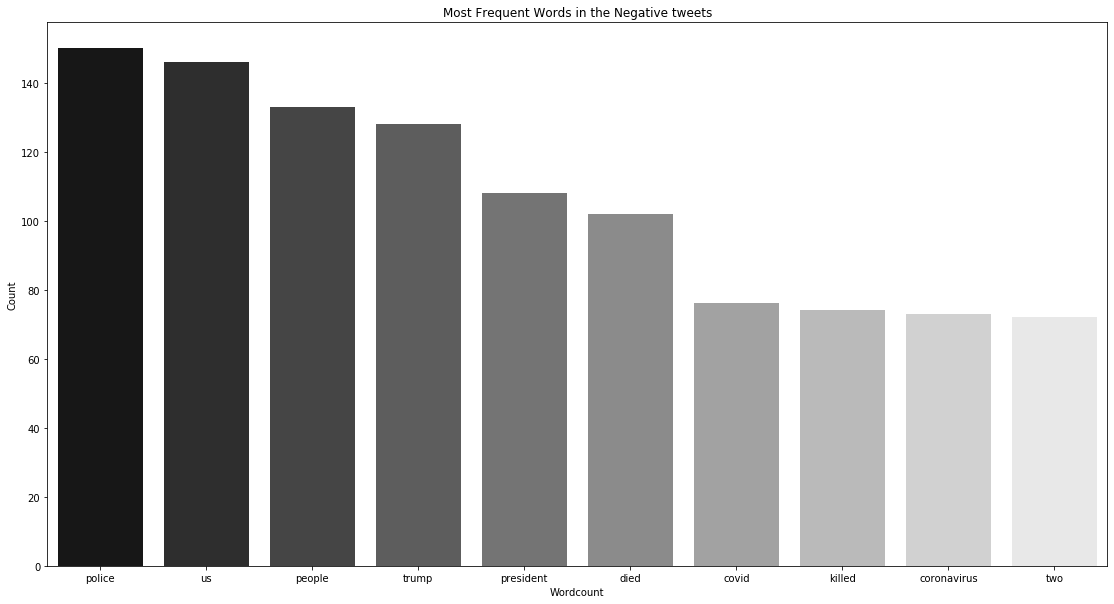

In [45]:
# Most Frequent Words - Negative Tweets

an = nltk.FreqDist(wordcloud(negative_tweets)[1])
dn = pd.DataFrame({'Wordcount': list(an.keys()),
                  'Count': list(an.values())})
# selecting top 10 most frequent hashtags     
dn = dn.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Negative tweets')
ax = sns.barplot(data=dn,palette="gray", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()

fig.savefig("cnn_negative_tweets_wf.png")
plt.show()

# Most Frequent Words - Neutral Tweets

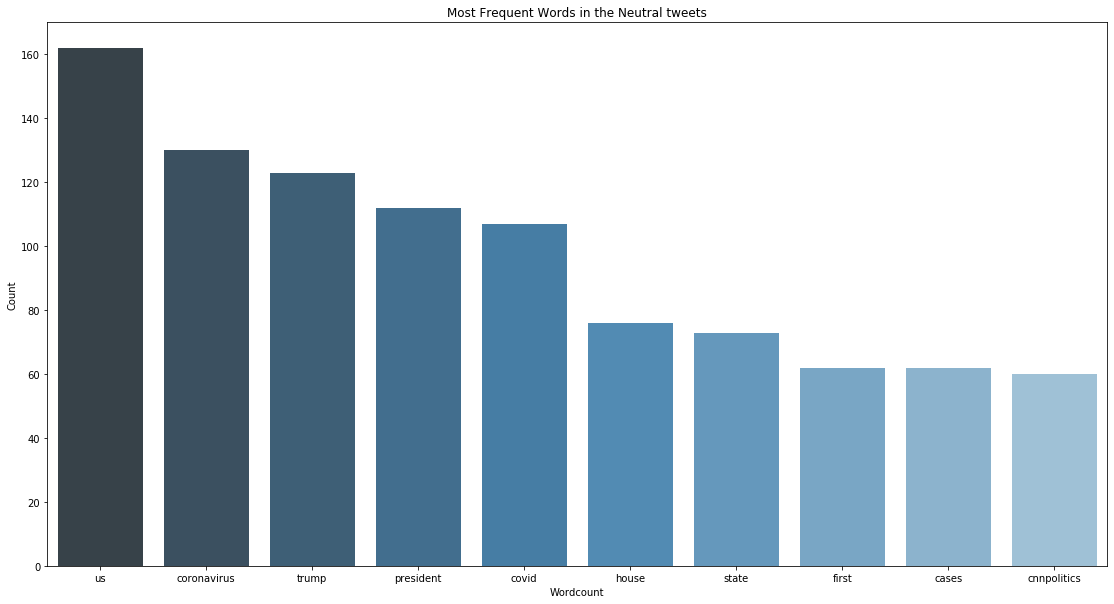

In [46]:
# Most Frequent Words - Neutral Tweets

au = nltk.FreqDist(wordcloud(neutral_tweets)[1])
du = pd.DataFrame({'Wordcount': list(au.keys()),
                  'Count': list(au.values())})
# selecting top 10 most frequent hashtags     
du = du.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Neutral tweets')
ax = sns.barplot(data=du, palette= "Blues_d",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("cnn_neutral_tweets_wf.png")
plt.show()